In [1]:
from mainFunctions import *

# IMPORTANT !
the sharpening approach and wavelet approach on all type of noises were not so good, so I decided to only plot median, bilateral, and blur approach on all type of noises. and the results were as expected, median and bilateral approach were the best on all type of noises. just like mentioned in the report.

In [17]:
def draw_bar_chart(noise_file_name, filter_type, filter_size):
    categories = ["Med", "Normal", "RS"]
    mse_data = []
    psnr_data = []
    ssim_data = []
    mae_data = []

    for category in categories:
        mse_category = []
        psnr_category = []
        ssim_category = []
        mae_category = []

        original_category_folder = os.path.join('dataset', category)
        noised_category_folder = os.path.join(noise_file_name, category)

        for filename in os.listdir(original_category_folder):
            if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
                original_image_path = os.path.join(original_category_folder, filename)
                noised_image_path = os.path.join(noised_category_folder, filename)

                original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
                noised_image = cv2.imread(noised_image_path, cv2.IMREAD_GRAYSCALE)
                denoised_image = apply_filters(noised_image, filter_type, filter_size)

                mse_i, psnr_i, ssim_i, mae_i = calculate_quality_metrics(original_image, denoised_image)
                mse_category.append(mse_i)
                psnr_category.append(psnr_i)
                ssim_category.append(ssim_i)
                mae_category.append(mae_i)

        mse_data.append(np.mean(mse_category))
        psnr_data.append(np.mean(psnr_category))
        ssim_data.append(np.mean(ssim_category))
        mae_data.append(np.mean(mae_category))

    # Draw bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(3)
    width = 0.2
    rects1 = ax.bar(x - width, mse_data, width, label='MSE')
    rects2 = ax.bar(x, psnr_data, width, label='PSNR')
    rects3 = ax.bar(x + width, ssim_data, width, label='SSIM')
    rects4 = ax.bar(x + 2 * width, mae_data, width, label='MAE')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by category')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    fig.tight_layout()
    plt.show()


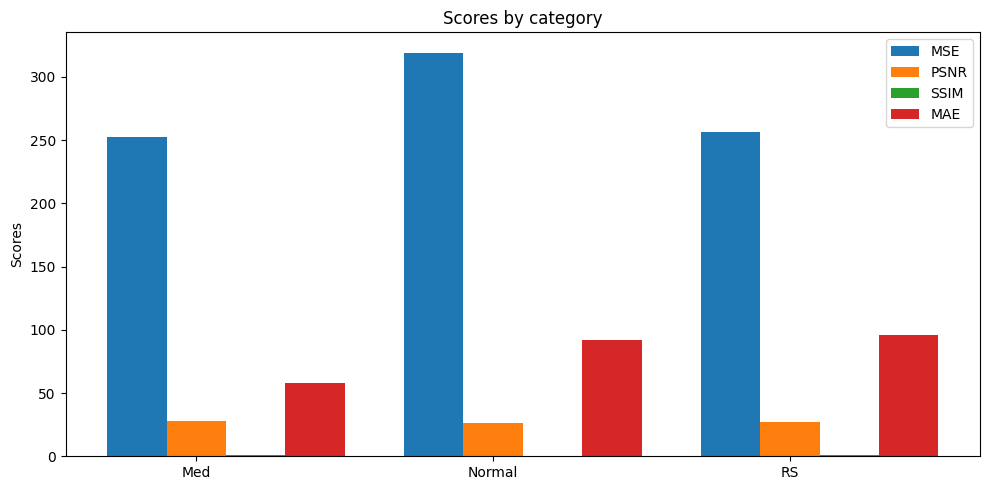

In [18]:
draw_bar_chart("dataset-noise-salt-and-pepper", "median", 3)

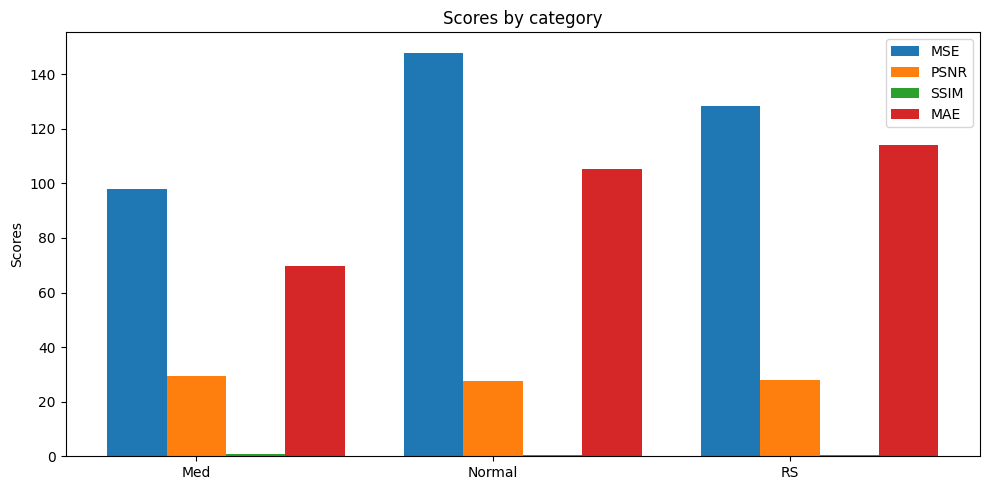

In [19]:
draw_bar_chart("dataset-noise-salt-and-pepper", "median", 5)

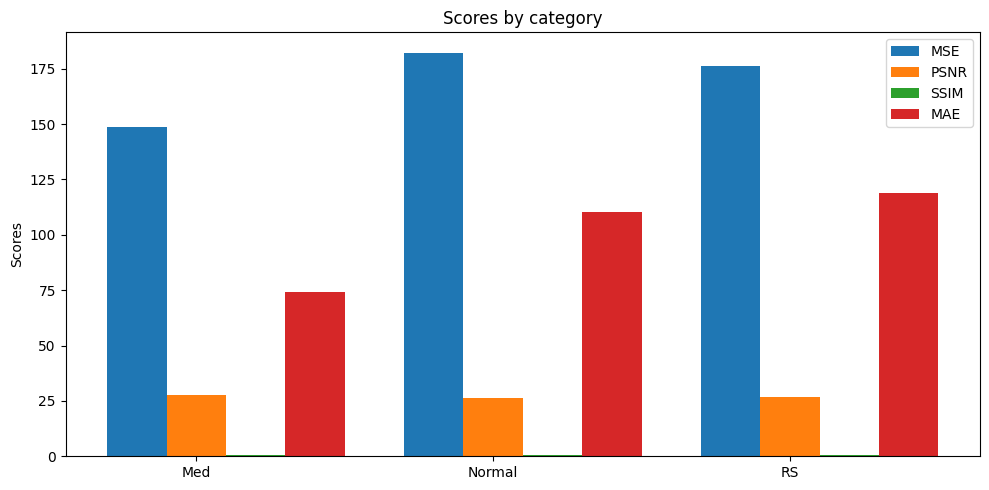

In [20]:
draw_bar_chart("dataset-noise-salt-and-pepper", "median", 7)

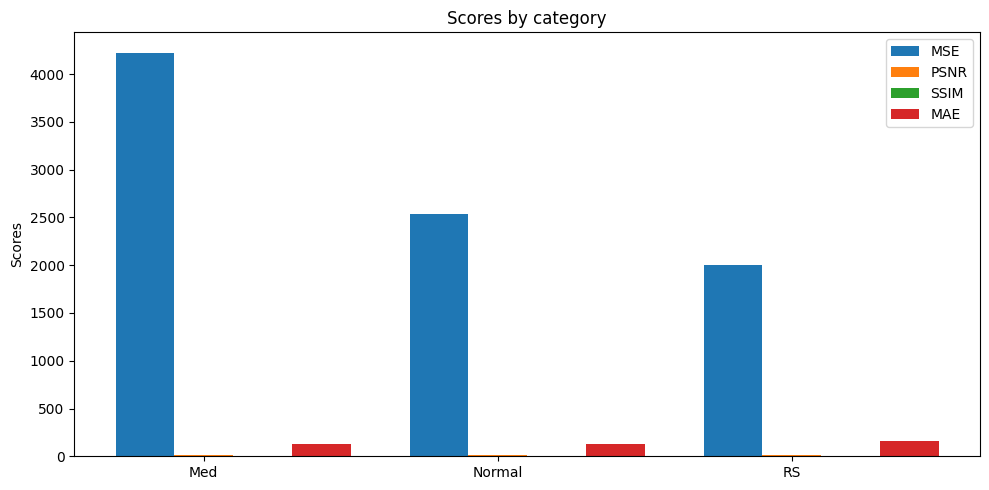

In [21]:
draw_bar_chart("dataset-noise-salt-and-pepper", "bilateral", 5)

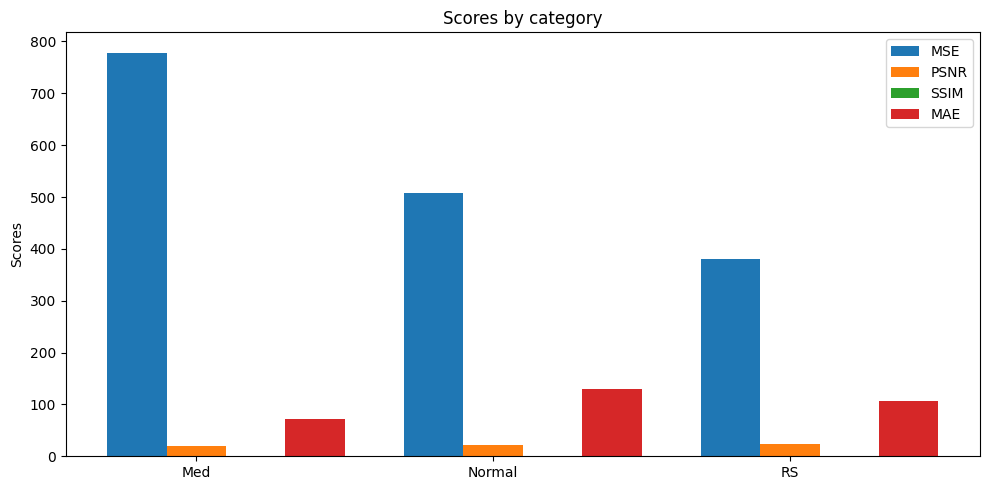

In [22]:
draw_bar_chart("dataset-noise-salt-and-pepper", "blur", 5)

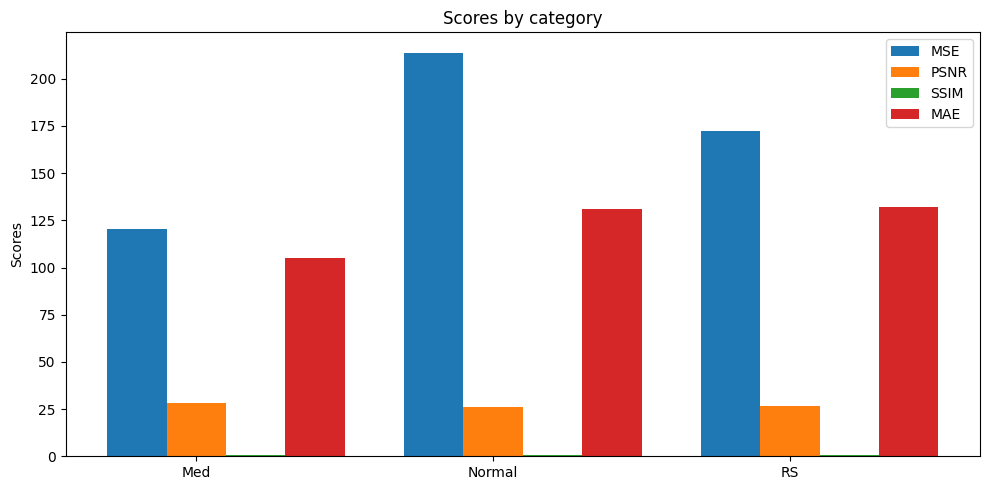

In [23]:
draw_bar_chart("dataset-noise-speckle", "median", 5)

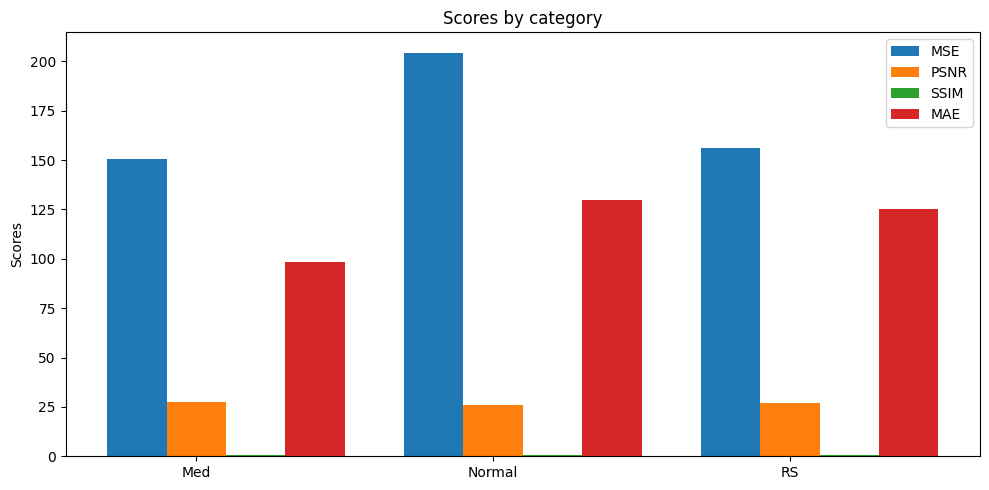

In [24]:
draw_bar_chart("dataset-noise-speckle", "blur", 5)

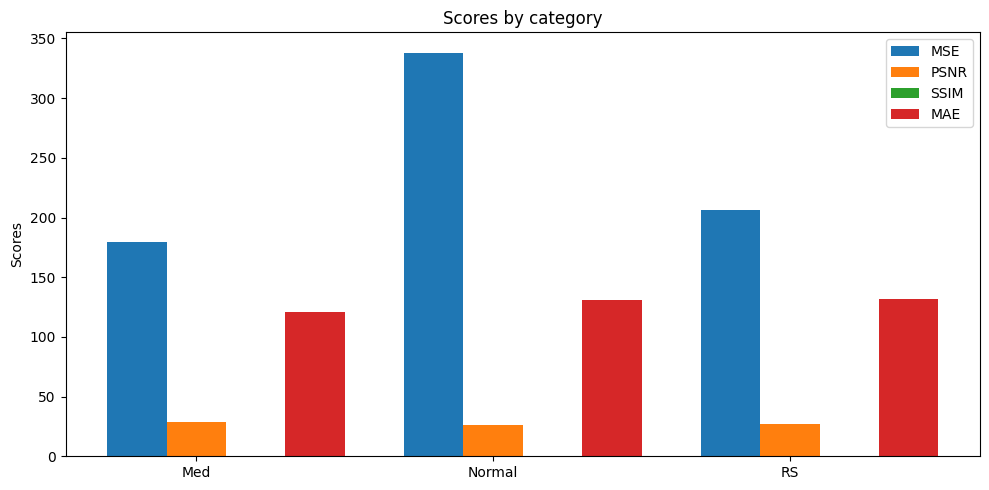

In [25]:
draw_bar_chart("dataset-noise-speckle", "bilateral", 5)

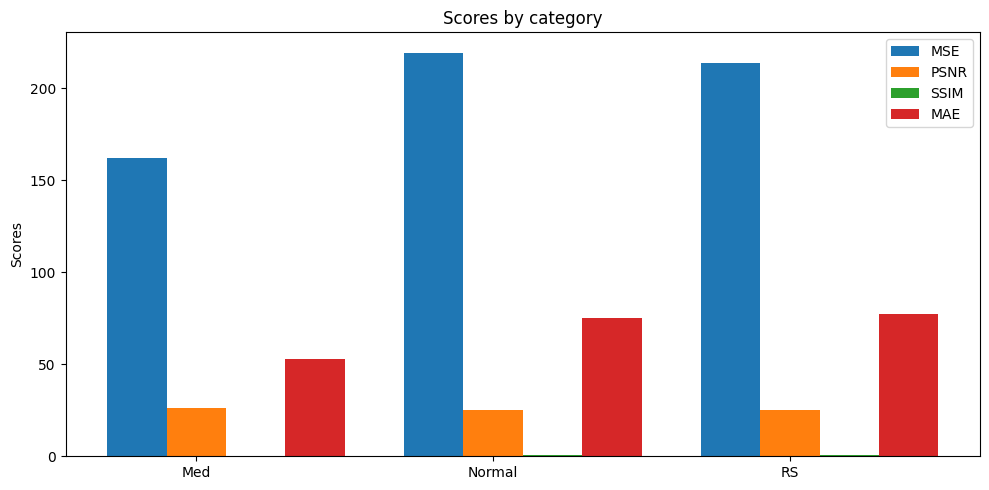

In [26]:
draw_bar_chart("gaussian-noise", "median", 5)

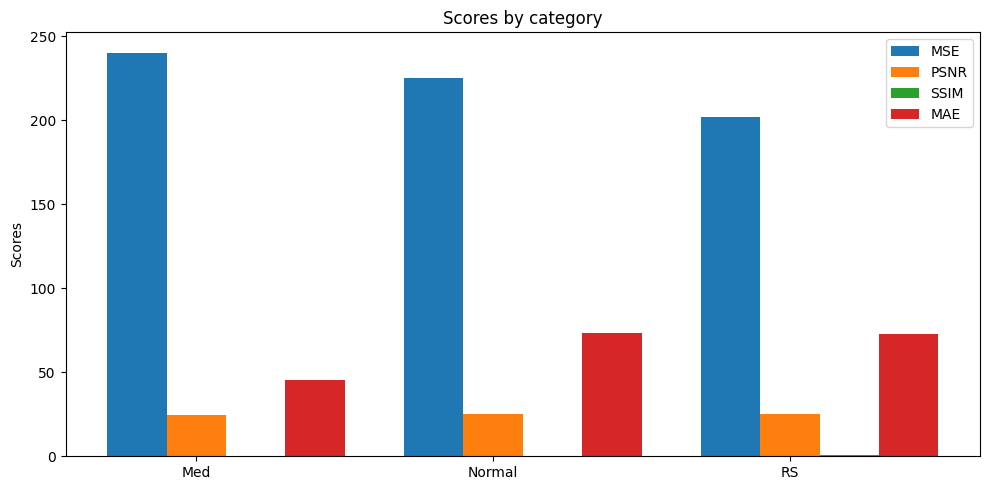

In [27]:
draw_bar_chart("gaussian-noise", "blur", 5)

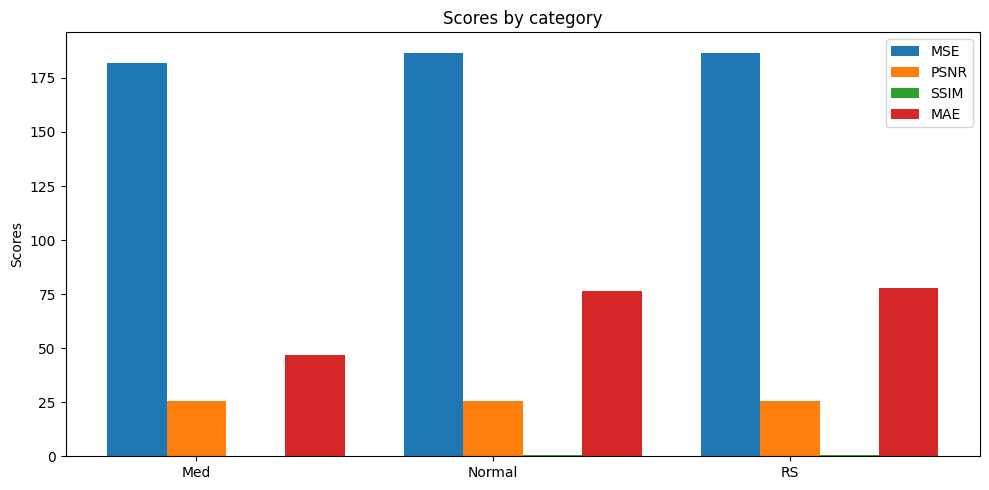

In [28]:
draw_bar_chart("gaussian-noise", "bilateral", 5)

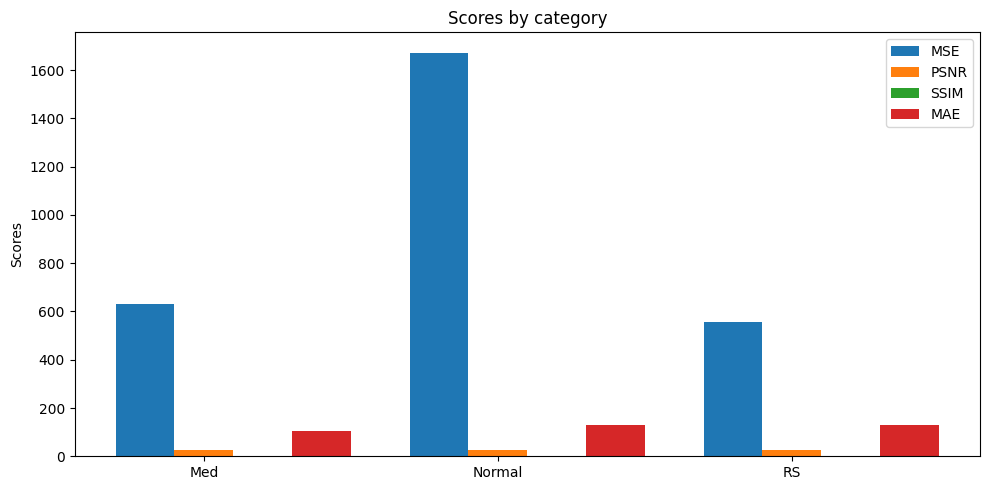

In [29]:
draw_bar_chart("poisson-noise", "median", 5)

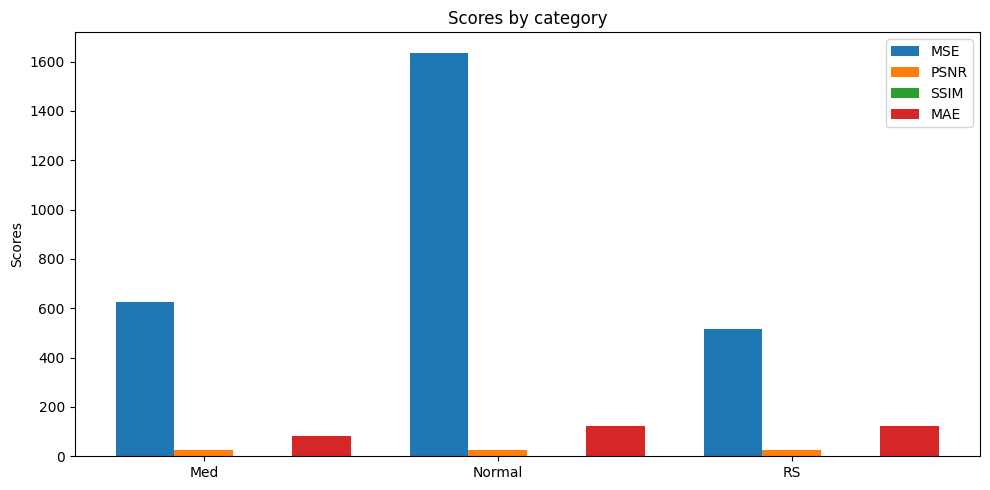

In [32]:
draw_bar_chart("poisson-noise", "blur", 5)

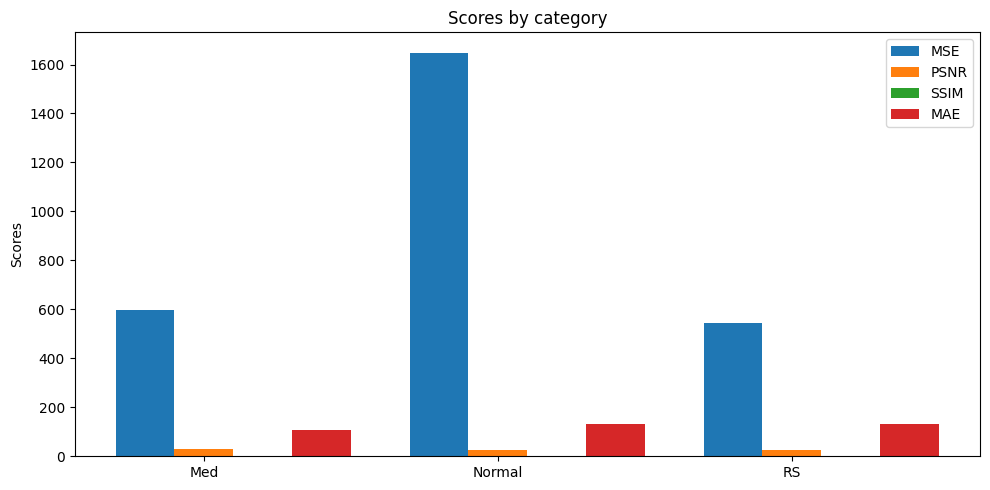

In [33]:
draw_bar_chart("poisson-noise", "bilateral", 5)